/tmp/ipykernel_14076/1820931260.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['cluster'] = kmeans.predict(df_filtrado)


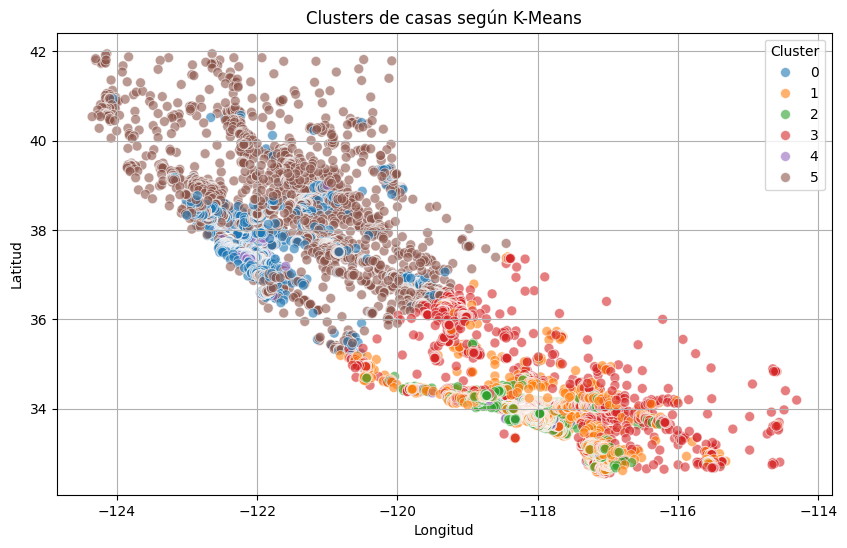

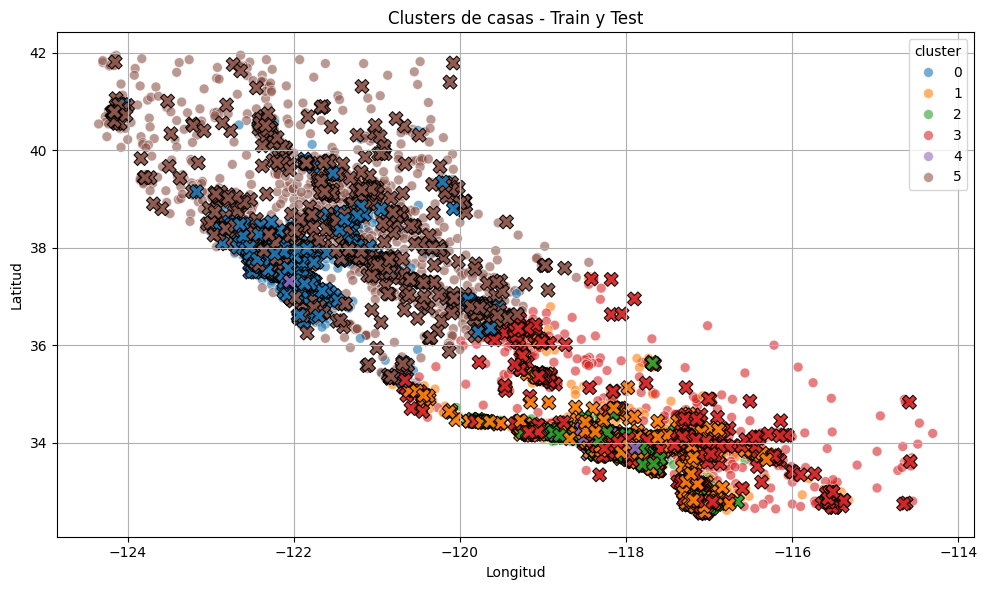

Accuracy: 0.9941860465116279

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      1.00      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128

Modelos guardados en /workspaces/UNSUPERVISED_LEARNING/models/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os

# Cargar los datos
total_data = pd.read_csv("/workspaces/UNSUPERVISED_LEARNING/data/raw/housing.csv")

# Seleccionar las columnas relevantes
df_filtrado = total_data[['Latitude', 'Longitude', 'MedInc']]

# Dividir en train y test (por ejemplo, 80% train, 20% test)
X_train, X_test = train_test_split(df_filtrado, test_size=0.2, random_state=42)

# Restablecer los índices de X_train y X_test
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Entrenar el modelo KMeans con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Predecir los clusters para todos los datos (también podemos predecir test más adelante)
df_filtrado['cluster'] = kmeans.predict(df_filtrado)

# Predicción del conjunto de test
X_test_clusters = kmeans.predict(X_test)

# Crear una copia del test y le añadimos la columna 'cluster'
X_test_con_clusters = X_test.copy()
X_test_con_clusters['cluster'] = X_test_clusters

# Visualizar los clusters en un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Longitude', y='Latitude', hue='cluster', palette='tab10', s=50, alpha=0.6)
plt.title('Clusters de casas según K-Means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar datos de entrenamiento
sns.scatterplot(
    data=df_filtrado,
    x='Longitude',
    y='Latitude',
    hue='cluster',
    palette='tab10',
    s=50,
    alpha=0.6,
    legend='brief'
)

# Graficar datos de test (misma paleta, pero usando marcadores 'X' y borde negro)
sns.scatterplot(
    data=X_test_con_clusters,
    x='Longitude',
    y='Latitude',
    hue='cluster',
    palette='tab10',
    s=100,
    marker='X',
    edgecolor='black',
    alpha=0.9,
    legend=False  # Para evitar conflicto de leyendas duplicadas
)

plt.title('Clusters de casas - Train y Test')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 4: Entrenar un modelo de clasificación supervisada

# Usamos las etiquetas de cluster generadas por K-Means como etiquetas de clase
y_train = kmeans.labels_  # Etiquetas de cluster para el conjunto de entrenamiento
y_test = X_test_clusters  # Etiquetas de cluster para el conjunto de prueba

# Ahora vamos a usar un árbol de decisión como modelo de clasificación
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Imprimir las estadísticas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Paso 5: Guardar los modelos

# Ruta para guardar los modelos
model_folder = "/workspaces/UNSUPERVISED_LEARNING/models/"

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Guardar el modelo de KMeans
kmeans_filename = model_folder + "kmeans_model.joblib"
joblib.dump(kmeans, kmeans_filename)

# Guardar el modelo de clasificación supervisada
clf_filename = model_folder + "decision_tree_model.joblib"
joblib.dump(clf, clf_filename)

print(f"Modelos guardados en {model_folder}")